In [1]:
#Año 2011
# El test son los meses de enero a marzo
# El train son los meses de abril a diciembre

### Columnas de entrada :
        * temperatura
        * humedad relativa
        * sensibilidad de los sensores(5)
        * target: 3 factores de polución

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
train = pd.read_csv('../input/train.csv', index_col=[0], parse_dates=True)
test = pd.read_csv('../input/test.csv', index_col=[0], parse_dates=True)
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7111 entries, 2010-03-10 18:00:00 to 2011-01-01 00:00:00
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   deg_C                   7111 non-null   float64
 1   relative_humidity       7111 non-null   float64
 2   absolute_humidity       7111 non-null   float64
 3   sensor_1                7111 non-null   float64
 4   sensor_2                7111 non-null   float64
 5   sensor_3                7111 non-null   float64
 6   sensor_4                7111 non-null   float64
 7   sensor_5                7111 non-null   float64
 8   target_carbon_monoxide  7111 non-null   float64
 9   target_benzene          7111 non-null   float64
 10  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11)
memory usage: 666.7 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2247 entries, 2011-01-01 00:00:00 to 2011-04-04 14:00:00
Data colum

<AxesSubplot:xlabel='date_time'>

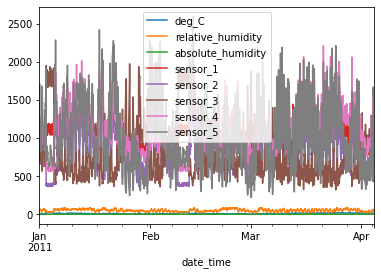

In [4]:
test.plot()

In [5]:
# A little EDA

/opt/anaconda3/envs/bootcamp/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


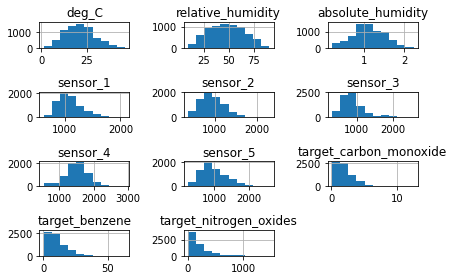

In [6]:
train.hist()
plt.tight_layout()

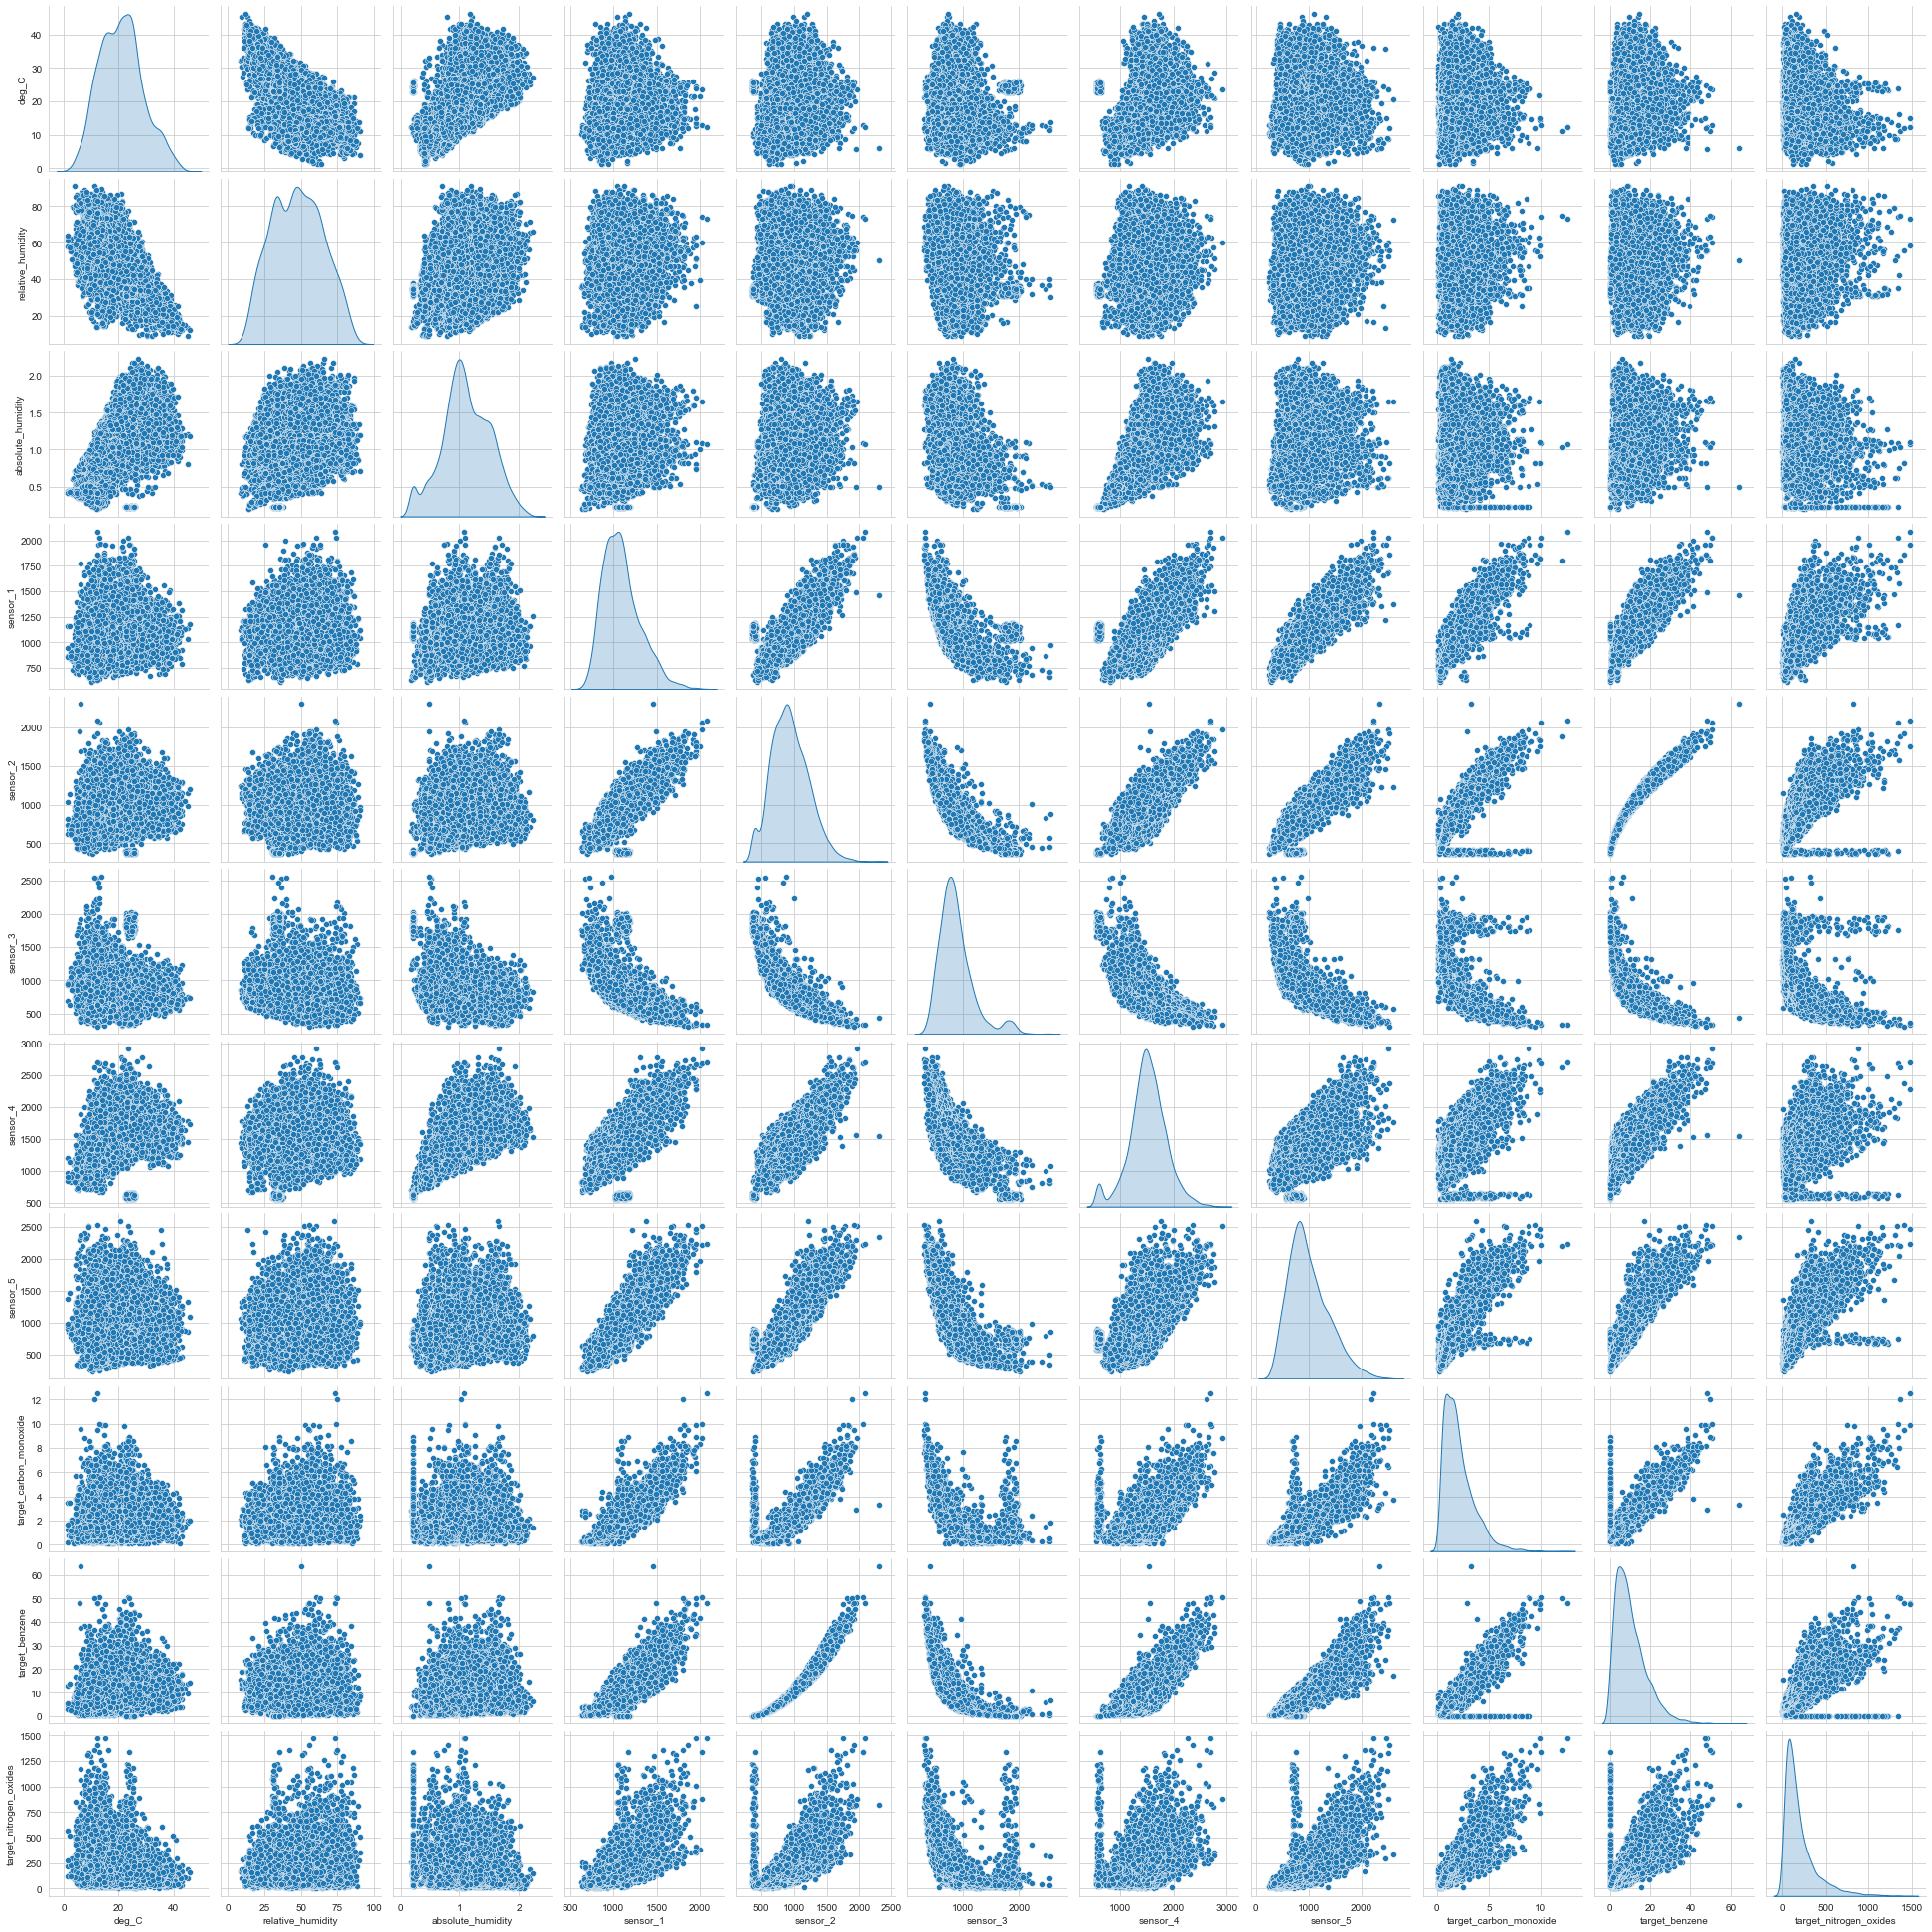

In [7]:
sns.set_style('whitegrid')
sns.pairplot(train, diag_kind='kde')

<AxesSubplot:xlabel='date_time'>

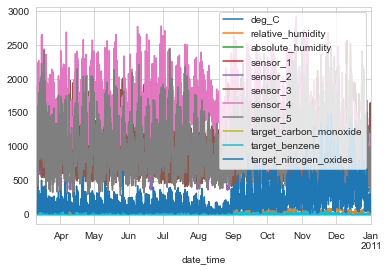

In [8]:
train.plot()

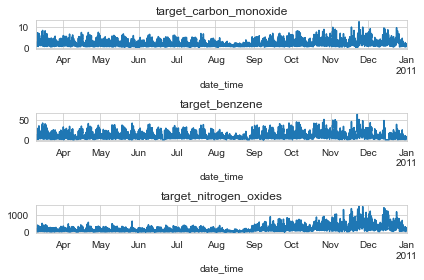

In [9]:
y = train[['target_carbon_monoxide', 'target_benzene','target_nitrogen_oxides']]
plt.subplots(3,1)
for index,column in enumerate(y.columns):
    plt.subplot(3,1,1+index)
    y[column].plot()
    plt.tight_layout()
    plt.title(column)
    

<AxesSubplot:xlabel='date_time'>

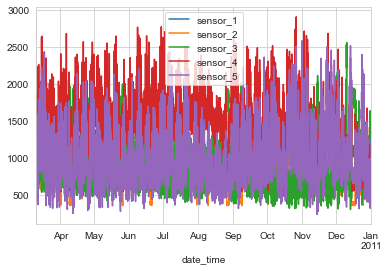

In [10]:
sensors = ['sensor_1','sensor_2','sensor_3','sensor_4','sensor_5']
train[sensors].plot()

In [11]:
# We can get some features in date
# By other side, we must normalize all possible.

train['day'] = train.index.day
train['month'] = train.index.month
train['hour'] = train.index.hour
train['dayofweek'] = train.index.dayofweek
train['deg_C_relative'] = train.deg_C / train.deg_C.max()

std = StandardScaler()

train[sensors] = std.fit_transform(train[sensors])

In [12]:
# Do same in test
test['day'] = test.index.day
test['month'] = test.index.month
test['hour'] = test.index.hour
test['dayofweek'] = test.index.dayofweek
test['deg_C_relative'] = test.deg_C / test.deg_C.max()

std = StandardScaler()

test[sensors] = std.fit_transform(test[sensors])

In [13]:
## We can get more features

train['night'] = np.where((train.hour < 7) | (train.hour > 22),1,0)
train['summer'] = np.where((train.month > 7) & (train.month < 9),1,0)
train['spring'] = np.where((train.month > 3) & (train.month < 7),1,0)
train['autumn'] = np.where((train.month > 9) & (train.month <= 11),1,0)
train['winter'] = np.where((train.month >= 1) & (train.month < 3) | (train.month == 12) ,1,0)
train['weekend'] = np.where(train.dayofweek > 5,1,0)

In [14]:
## Do same in test
## We can get more features

test['night'] = np.where((test.hour < 7) | (test.hour > 22),1,0)
test['summer'] = np.where((test.month > 7) & (test.month < 9),1,0)
test['spring'] = np.where((test.month > 3) & (test.month < 7),1,0)
test['autumn'] = np.where((test.month > 9) & (test.month <= 11),1,0)
test['winter'] = np.where((test.month >= 1) & (test.month < 3) | (test.month == 12) ,1,0)
test['weekend'] = np.where(test.dayofweek > 5,1,0)

/opt/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


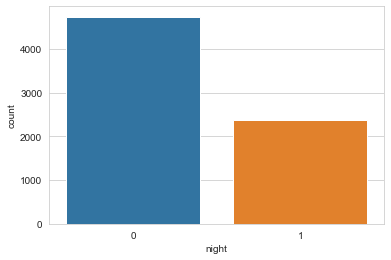

/opt/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


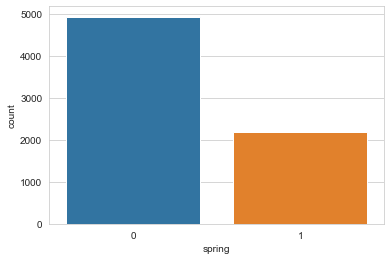

/opt/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


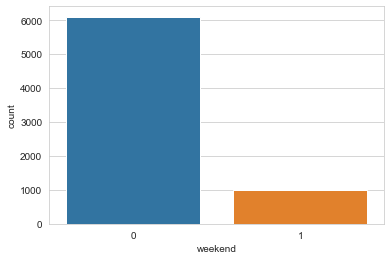

In [15]:
# Lets see any graphic

sns.countplot(train['night'])
plt.show()
sns.countplot(train['spring'])
plt.show()
sns.countplot(train['weekend'])
plt.show()

In [16]:
train.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,...,month,hour,dayofweek,deg_C_relative,night,summer,spring,autumn,winter,weekend
date_time,,,,,,,,,,,,,,,,,,,,,
2010-03-10 18:00:00,13.1,46.0,0.7578,1.352851,0.531052,0.554374,0.655599,0.773410,2.5,12.0,...,3,18,2,0.284165,0,0,0,0,0,0
2010-03-10 19:00:00,13.2,45.3,0.7255,0.858164,-0.176852,1.010186,-0.180886,0.032933,2.1,9.9,...,3,19,2,0.286334,0,0,0,0,0,0
2010-03-10 20:00:00,12.6,56.2,0.7502,1.099787,-0.030022,0.567903,0.208084,0.311038,2.2,9.2,...,3,20,2,0.273319,0,0,0,0,0,0
2010-03-10 21:00:00,11.0,62.4,0.7867,1.049907,-0.032150,0.705452,0.066432,0.694251,2.2,9.7,...,3,21,2,0.238612,0,0,0,0,0,0
2010-03-10 22:00:00,11.9,59.0,0.7888,0.825673,-0.302757,0.956713,-0.279128,0.350880,1.5,6.4,...,3,22,2,0.258134,0,0,0,0,0,0


/opt/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target_benzene', ylabel='target_carbon_monoxide'>

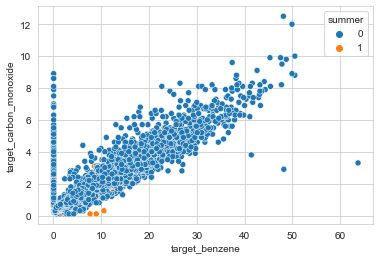

In [17]:
sns.scatterplot(train['target_benzene'],train['target_carbon_monoxide'], hue=train['summer'])

/opt/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target_benzene', ylabel='target_carbon_monoxide'>

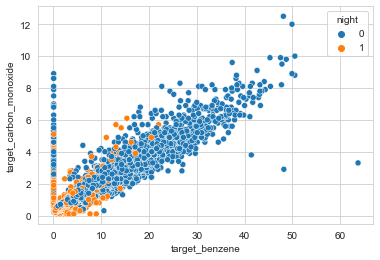

In [18]:
sns.scatterplot(train['target_benzene'],train['target_carbon_monoxide'], hue=train['night'])

/opt/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target_benzene', ylabel='target_carbon_monoxide'>

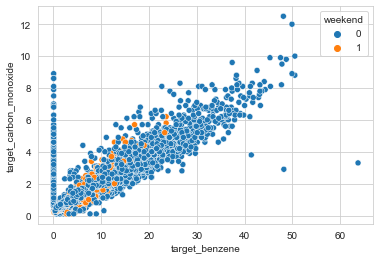

In [19]:
sns.scatterplot(train['target_benzene'],train['target_carbon_monoxide'], hue=train['weekend'])

/opt/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target_benzene', ylabel='target_carbon_monoxide'>

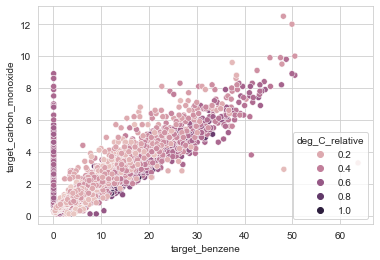

In [20]:
sns.scatterplot(train['target_benzene'],train['target_carbon_monoxide'], hue=train['deg_C_relative'])

In [21]:
train.columns

Index(['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides',
       'day', 'month', 'hour', 'dayofweek', 'deg_C_relative', 'night',
       'summer', 'spring', 'autumn', 'winter', 'weekend'],
      dtype='object')

In [22]:
cols = ['sensor_1','sensor_2','sensor_4','sensor_5','deg_C_relative','night','summer',
        'spring','autumn','winter', 'weekend']

In [23]:
X = train[cols]
test_clean = test[cols]
y

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,
2010-03-10 18:00:00,2.5,12.0,167.7
2010-03-10 19:00:00,2.1,9.9,98.9
2010-03-10 20:00:00,2.2,9.2,127.1
2010-03-10 21:00:00,2.2,9.7,177.2
2010-03-10 22:00:00,1.5,6.4,121.8
...,...,...,...
2010-12-31 20:00:00,1.3,5.1,191.1
2010-12-31 21:00:00,1.4,5.8,221.3
2010-12-31 22:00:00,1.6,5.2,227.4


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                   y,
                                                   test_size=0.1,
                                                   random_state=42)
X_train, X_relative_test, y_train, y_relative_test = train_test_split(X_train,
                                                                     y_train,
                                                                     test_size=0.1,
                                                                     random_state=42)


print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(X_relative_test.shape)
print(y_relative_test.shape)

(5759, 11)
(712, 11)
(5759, 3)
(712, 3)
(640, 11)
(640, 3)


In [25]:
from sklearn.neighbors import LocalOutlierFactor
# Identify outliers in the training dataset
lof = LocalOutlierFactor()

out = lof.fit_predict(X_train)


# Select rows that are not outliers
mask = out != -1

X_train, y_train = X_train.loc[mask,:], y_train.loc[mask,:]

In [26]:
import keras

model = keras.models.Sequential([
    keras.layers.Dense(input_dim = 11,
                      units=6,
                      activation='relu'),
    keras.layers.Dense(units=3)
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss = 'mean_squared_error', 
             optimizer=opt)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4,
                                                 restore_best_weights=True)
history = model.fit(X_train,
                   y_train,
                   epochs=100,
                   batch_size=128,
                   callbacks = early_stopping_cb, 
                   validation_data=(X_valid, y_valid))

Epoch 1/100
45/45 [==============================] - 1s 16ms/step - loss: 26635.2167 - val_loss: 26178.5938
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 25268.2109 - val_loss: 25025.0293
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 24291.0118 - val_loss: 22735.5957
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 20298.5375 - val_loss: 18647.9609
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 17582.2987 - val_loss: 14114.3896
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 12434.0038 - val_loss: 9709.5195
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 8770.7142 - val_loss: 6903.0317
Epoch 8/100
45/45 [==============================] - 0s 2ms/step - loss: 6747.5209 - val_loss: 5632.8110
Epoch 9/100
45/45 [==============================] - 0s 2ms/step - loss: 5464.5138 - val_loss: 4909.3081
Epoch 10/100
45/45 [=======================

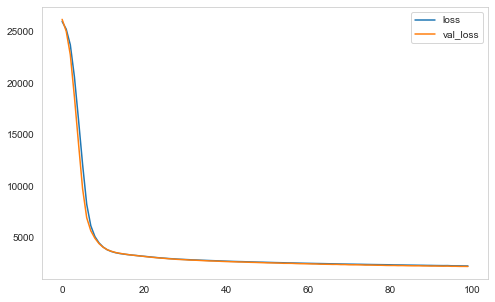

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.show()

**In train**

In [28]:
mse_train = model.evaluate(X_train,y_train)

pred_train = model.predict(X_train)
print(pred_train)
print(mse_train)

178/178 [==============================] - 0s 799us/step - loss: 2209.2886
[[  1.2692735    4.0100474  156.46988   ]
 [  1.2392324    5.699643   109.38947   ]
 [  3.1142187   18.322044   236.86981   ]
 ...
 [  0.39852786   1.2818365   34.289883  ]
 [  1.8491127    9.807581   150.18521   ]
 [  1.0642968    4.0924273  104.187126  ]]
2209.28857421875


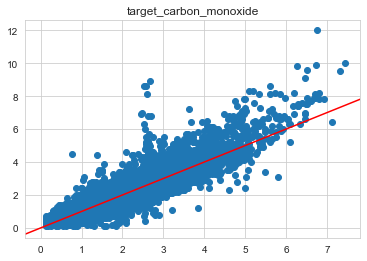

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(pred_train[:,0],y_train.iloc[:,0],'o')
plt.axline([0,0],[1,1],color='red')
plt.title(y_train.columns[0]);

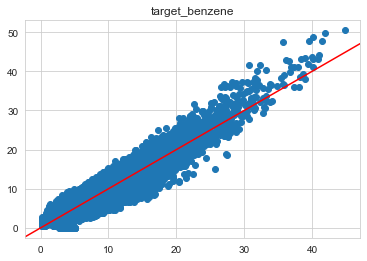

In [30]:
fig, ax = plt.subplots()
plt.plot(pred_train[:,1],y_train.iloc[:,1],'o')
plt.axline([0,0],[1,1],color='red')
plt.title(y_train.columns[1]);

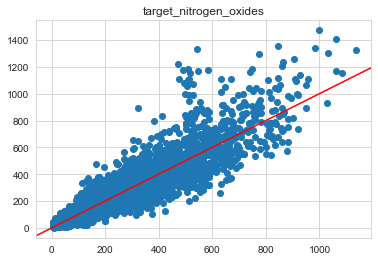

In [31]:
fig, ax = plt.subplots()
plt.plot(pred_train[:,2],y_train.iloc[:,2],'o')
plt.axline([0,0],[1,1],color='red')
plt.title(y_train.columns[2]);

**In test**

In [32]:
mse_test = model.evaluate(X_relative_test,y_relative_test)

pred_test = model.predict(X_relative_test)
print(pred_test)
print(mse_test)

20/20 [==============================] - 0s 1ms/step - loss: 2225.9353
[[  3.7517233  13.993881  618.9888   ]
 [  3.8345149  21.708952  450.1505   ]
 [  1.4721311   9.413664   92.46058  ]
 ...
 [  2.4320192  11.310762  272.34952  ]
 [  3.0086832  14.673013  358.8444   ]
 [  2.5309415  14.883617  188.4674   ]]
2225.935302734375


### Results:

**Carbon Monoxide**

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
mse_2 = mean_squared_error(pred_test,y_relative_test)
r2_2 = r2_score(pred_test[:,0],y_relative_test.iloc[:,0])
print ("Test ERROR = ", mse_2)
print ("Test R2 = ", r2_2)

Test ERROR =  2225.9354597839942
Test R2 =  0.6881370317398829


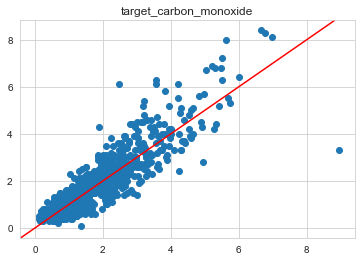

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(pred_test[:,0],y_relative_test.iloc[:,0],'o')
plt.axline([0,0],[1,1],color='red')
plt.title(y_relative_test.columns[0]);

**Benzene**

In [35]:
mse_3 = mean_squared_error(pred_test,y_relative_test)
r2_3 = r2_score(pred_test[:,1],y_relative_test.iloc[:,1])
print ("Test ERROR = ", mse_3)
print ("Test R2 = ", r2_3)

Test ERROR =  2225.9354597839942
Test R2 =  0.8535456311194887


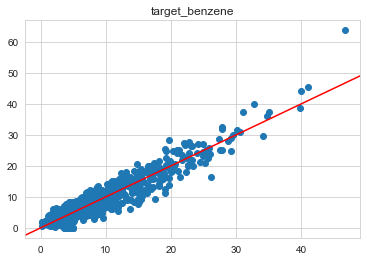

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(pred_test[:,1],y_relative_test.iloc[:,1],'o')
plt.axline([0,0],[1,1],color='red')
plt.title(y_relative_test.columns[1]);

**Nitrogen oxides**

In [37]:
mse_4 = mean_squared_error(pred_test,y_relative_test)
r2_4 = r2_score(pred_test[:,2],y_relative_test.iloc[:,2])
print ("Test ERROR = ", mse_4)
print ("Test R2 = ", r2_4)

Test ERROR =  2225.9354597839942
Test R2 =  0.7990602895609772


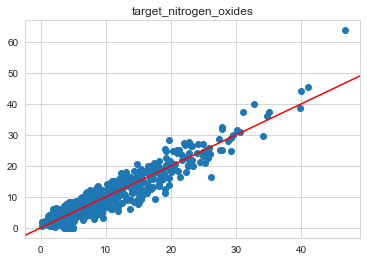

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(pred_test[:,1],y_relative_test.iloc[:,1],'o')
plt.axline([0,0],[1,1],color='red')
plt.title(y_relative_test.columns[2]);

In [39]:
#model.save('../input/model_regressor_pollution3.h5')

In [43]:
test_clean.shape

(2247, 11)

In [44]:
carbon_monoxide = []
benzene = []
nitrogen_oxides = []
date_time = test_clean.index

submission = model.predict(test_clean)

for i in submission:
        carbon_monoxide.append(i[0])
        benzene.append(i[1])
        nitrogen_oxides = (i[2])

df_results = pd.DataFrame({
    'date_time': date_time,
    'target_carbon_monoxide': carbon_monoxide,
    'target_benzene': benzene,
    'target_nitrogen_oxides': nitrogen_oxides
})
len(df_results)

2247

In [45]:
df_results.to_csv('submission5.csv', index=False)